#**CSI MONUSEN Object Detection**

In [ ]:
!nvidia-smi

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 20.5 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow (use your API key and workspace)**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("csi-if9pd").project("csi-qmqmx")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CSI-1 in yolov8:: 100%|██████████| 999/999 [00:00<00:00, 6458.36it/s]


In [ ]:
dataset.location

'/content/CSI-1'

**Step # 04 Train YOLO Model**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolov8n.pt" epochs=40 imgsz=640

**Step # 05 Examine Training Results**

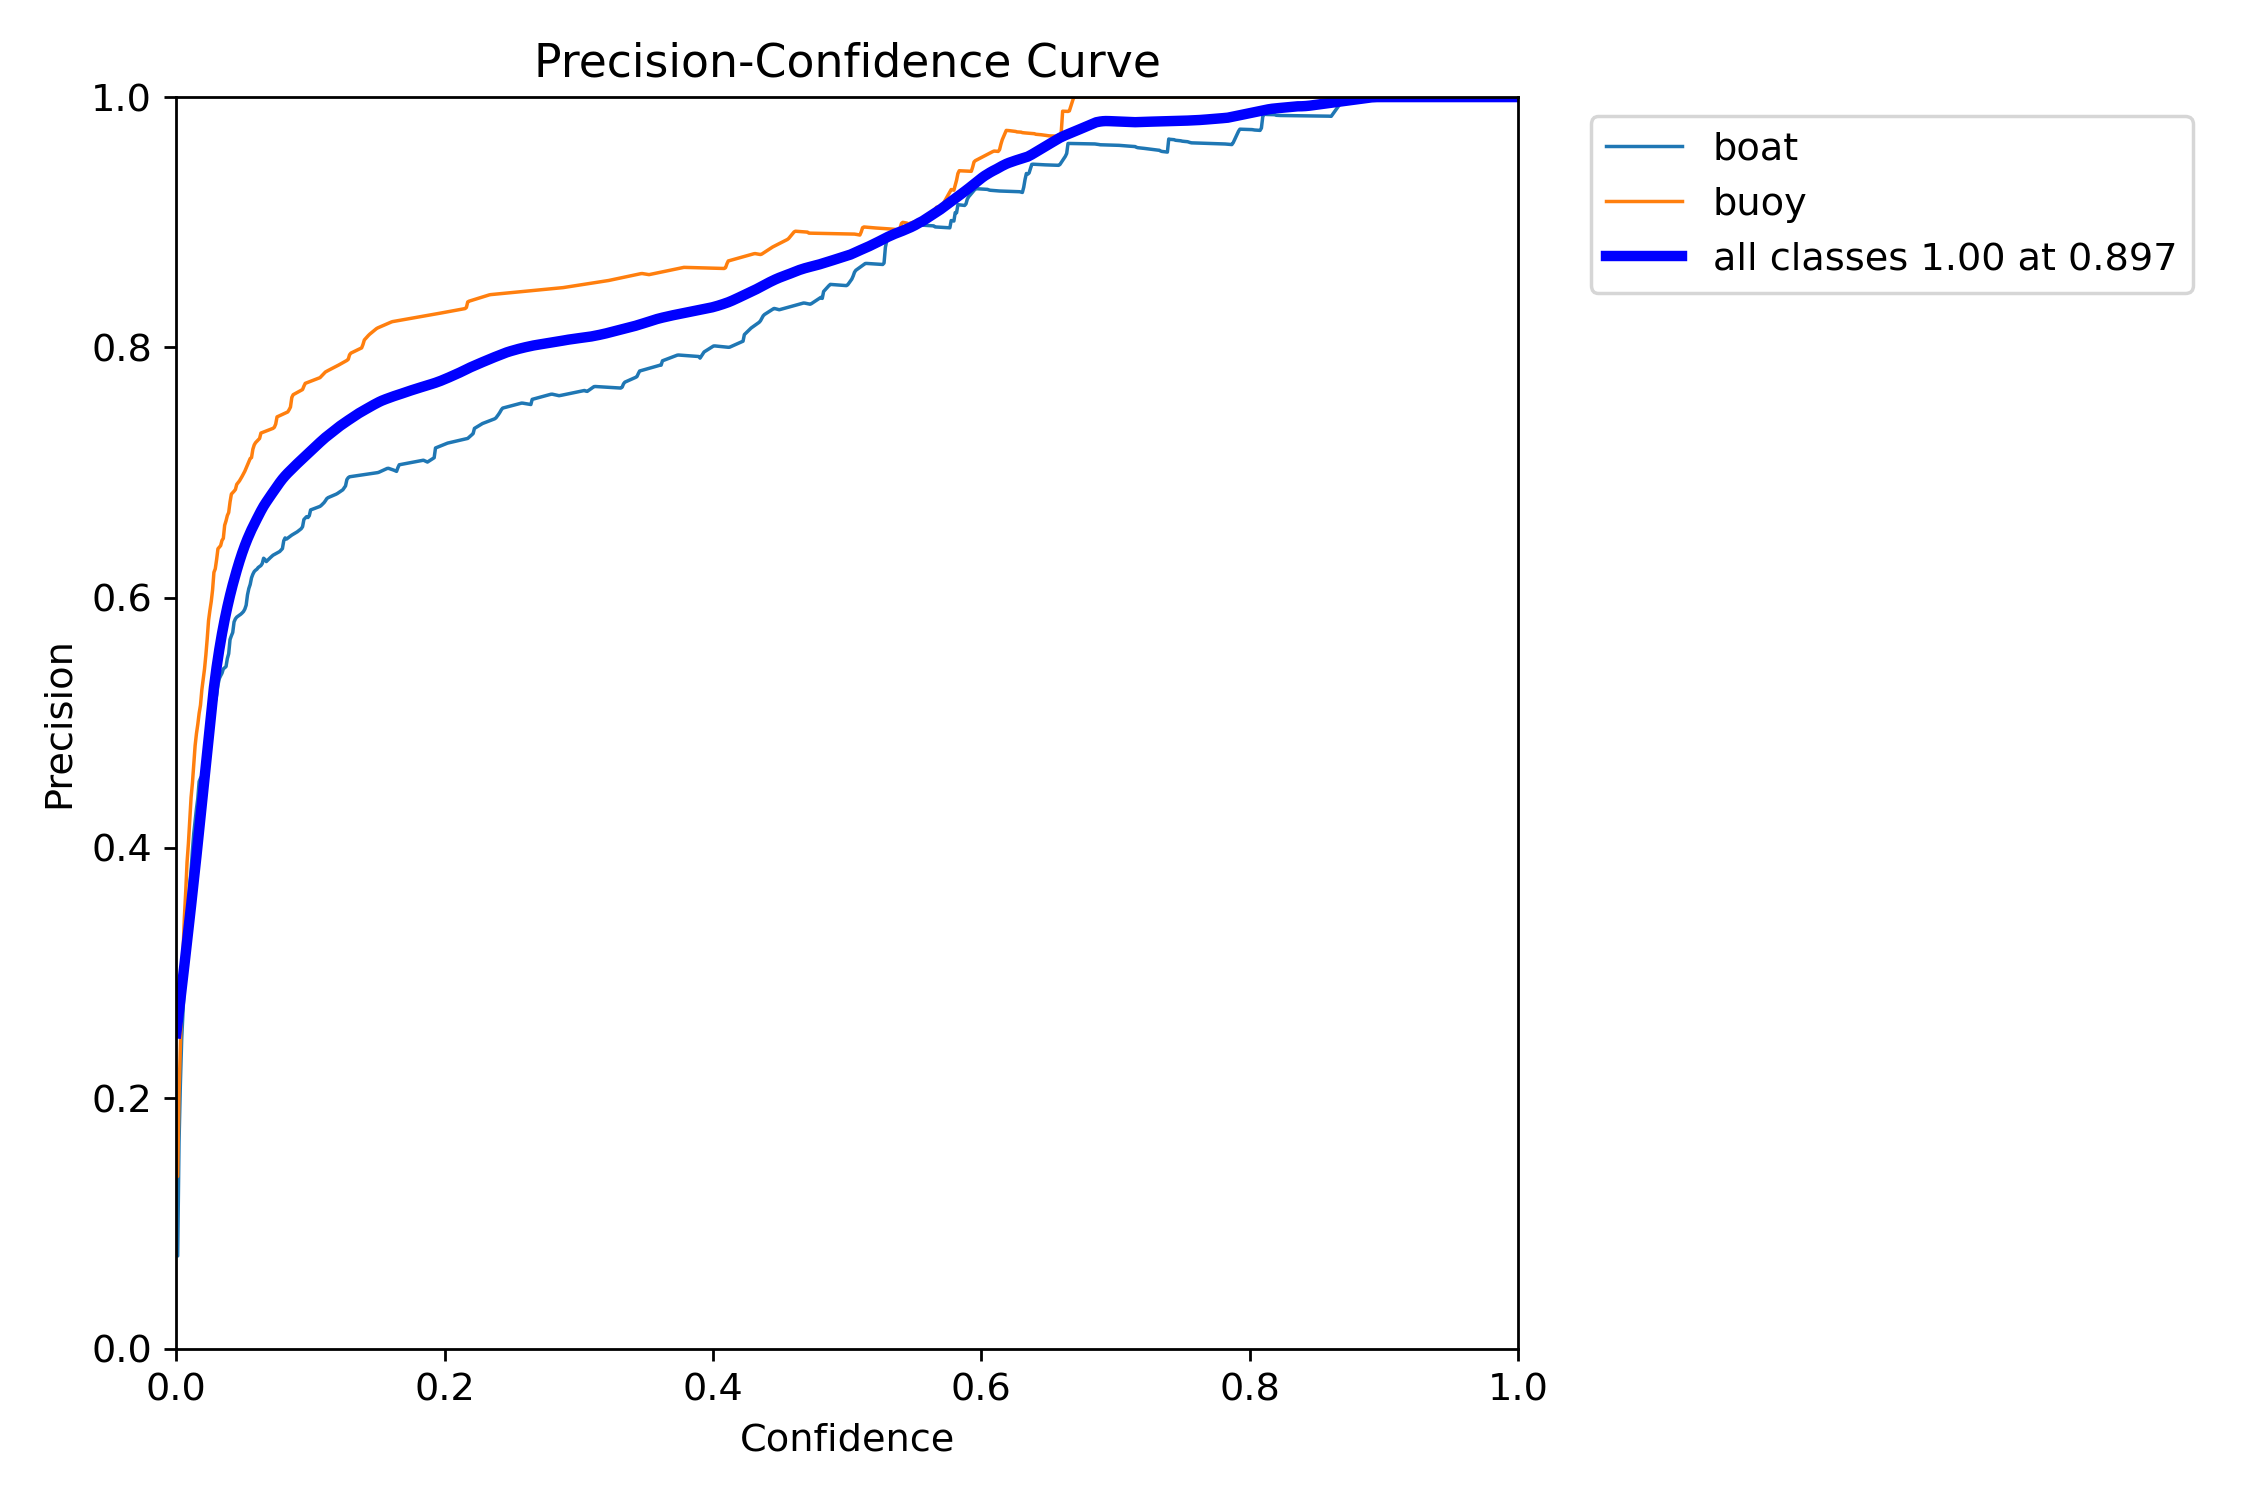

In [ ]:
Image("/content/runs/detect/train/P_curve.png", width=600)

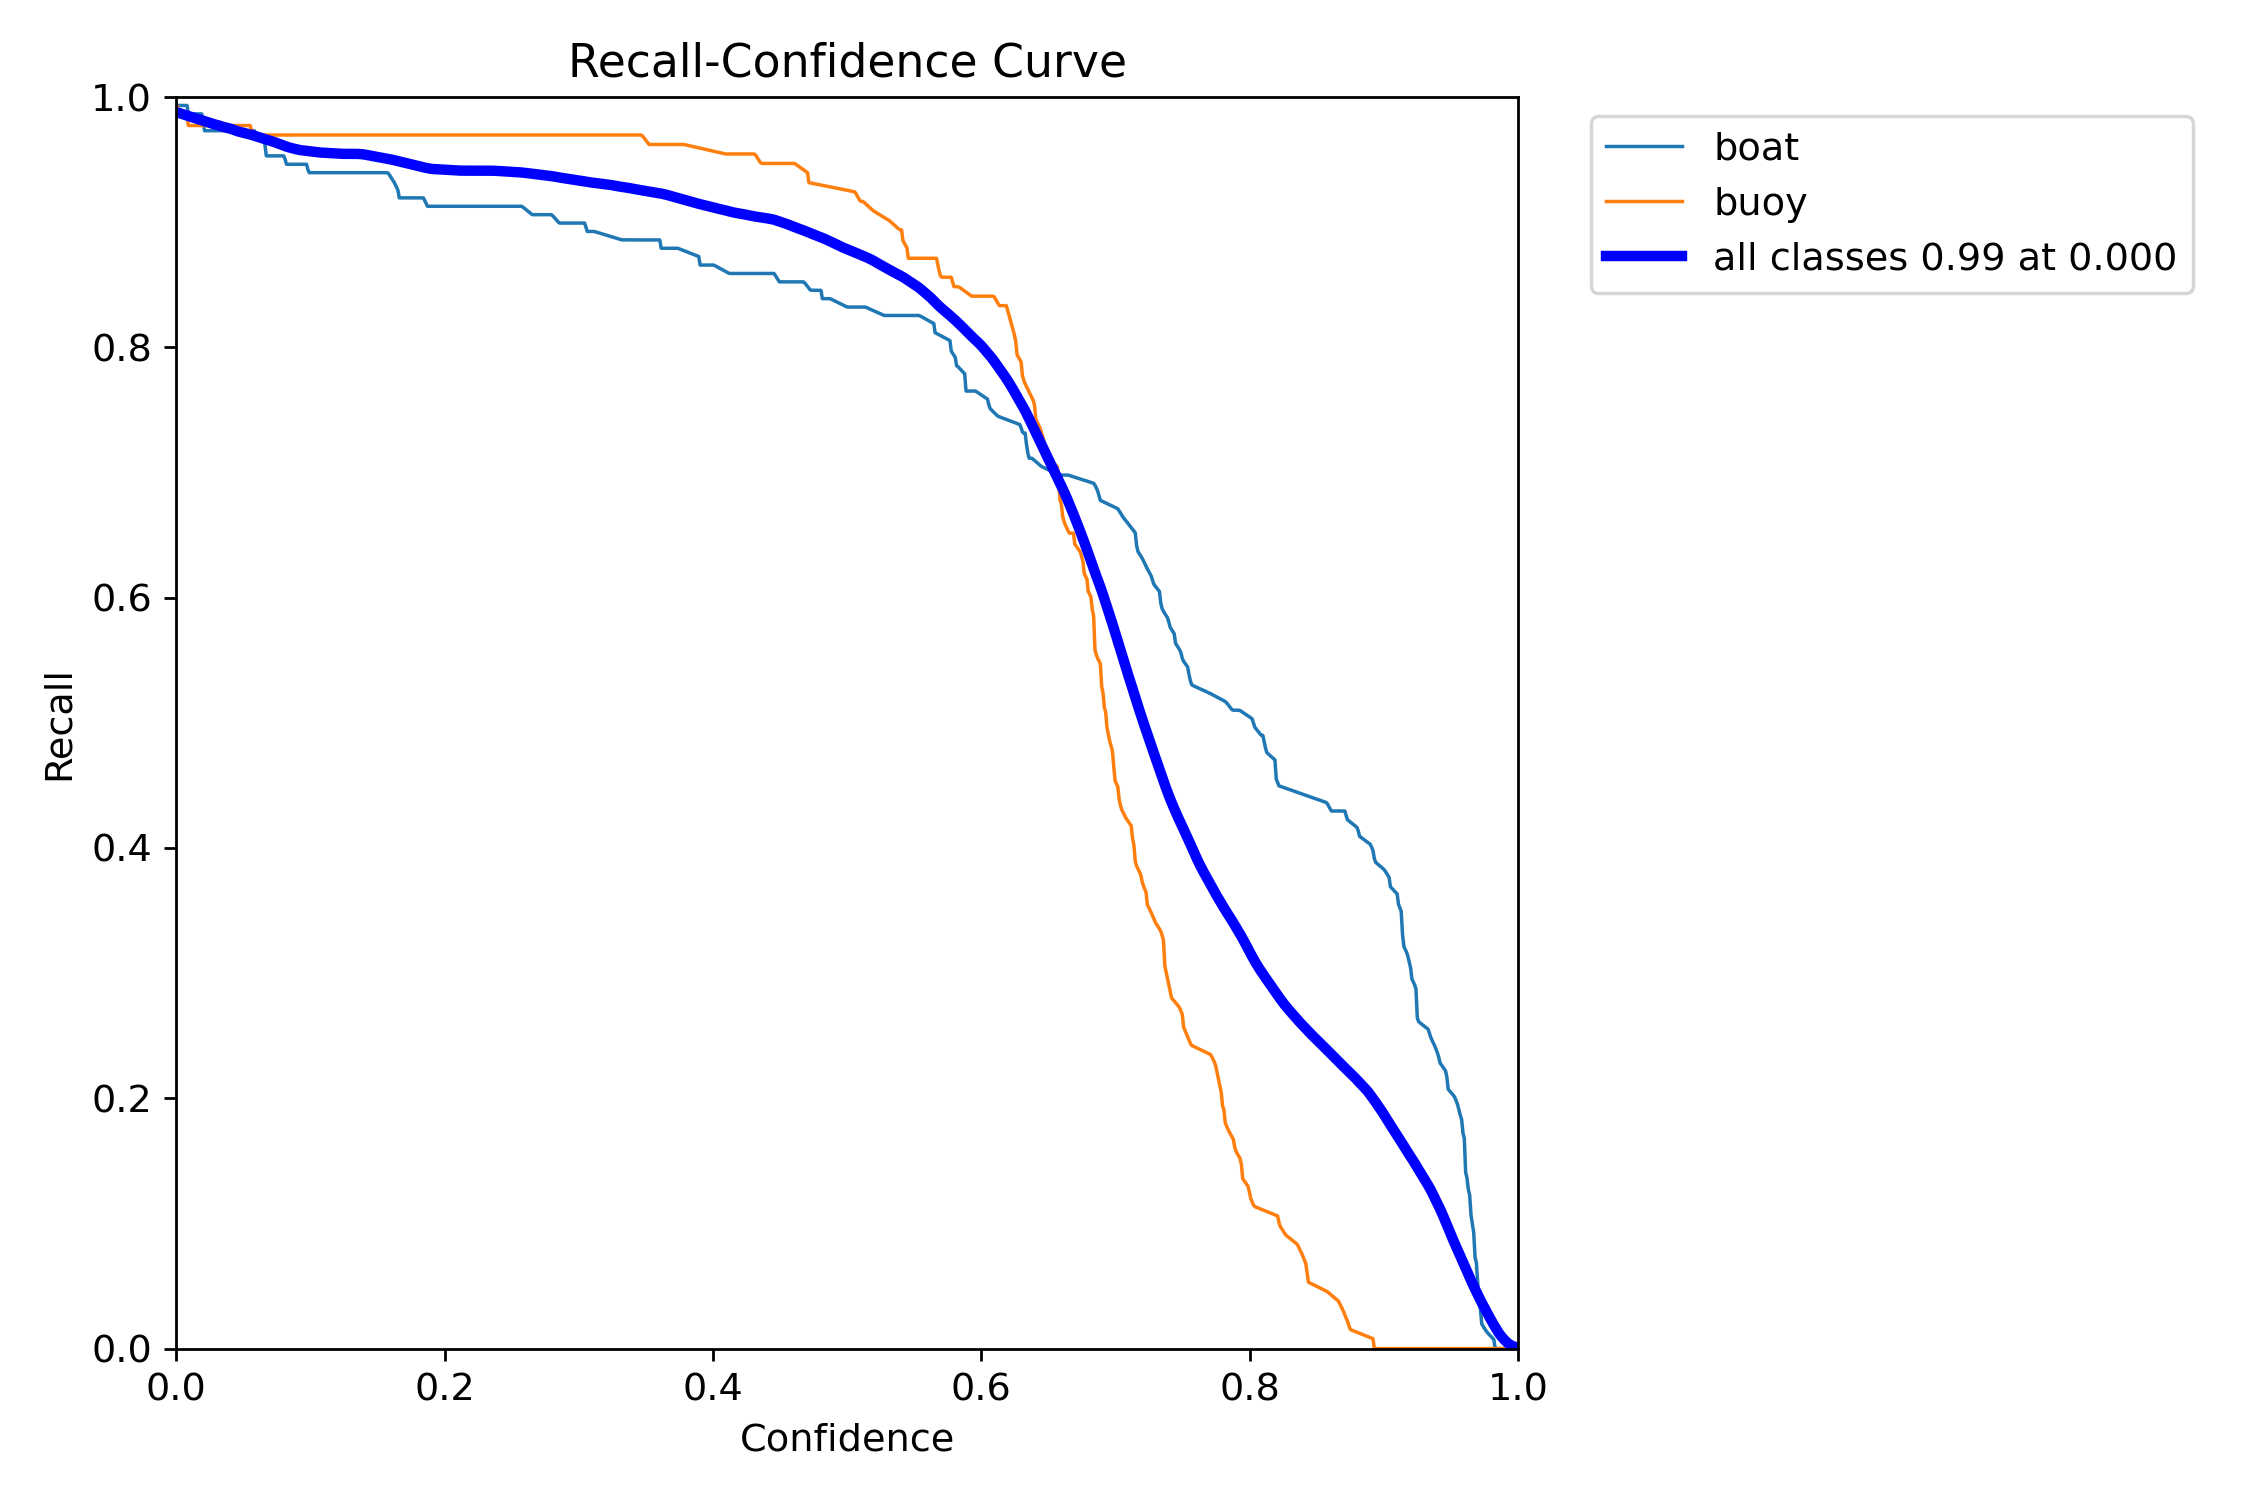

In [ ]:
Image("/content/runs/detect/train/R_curve.png", width=600)

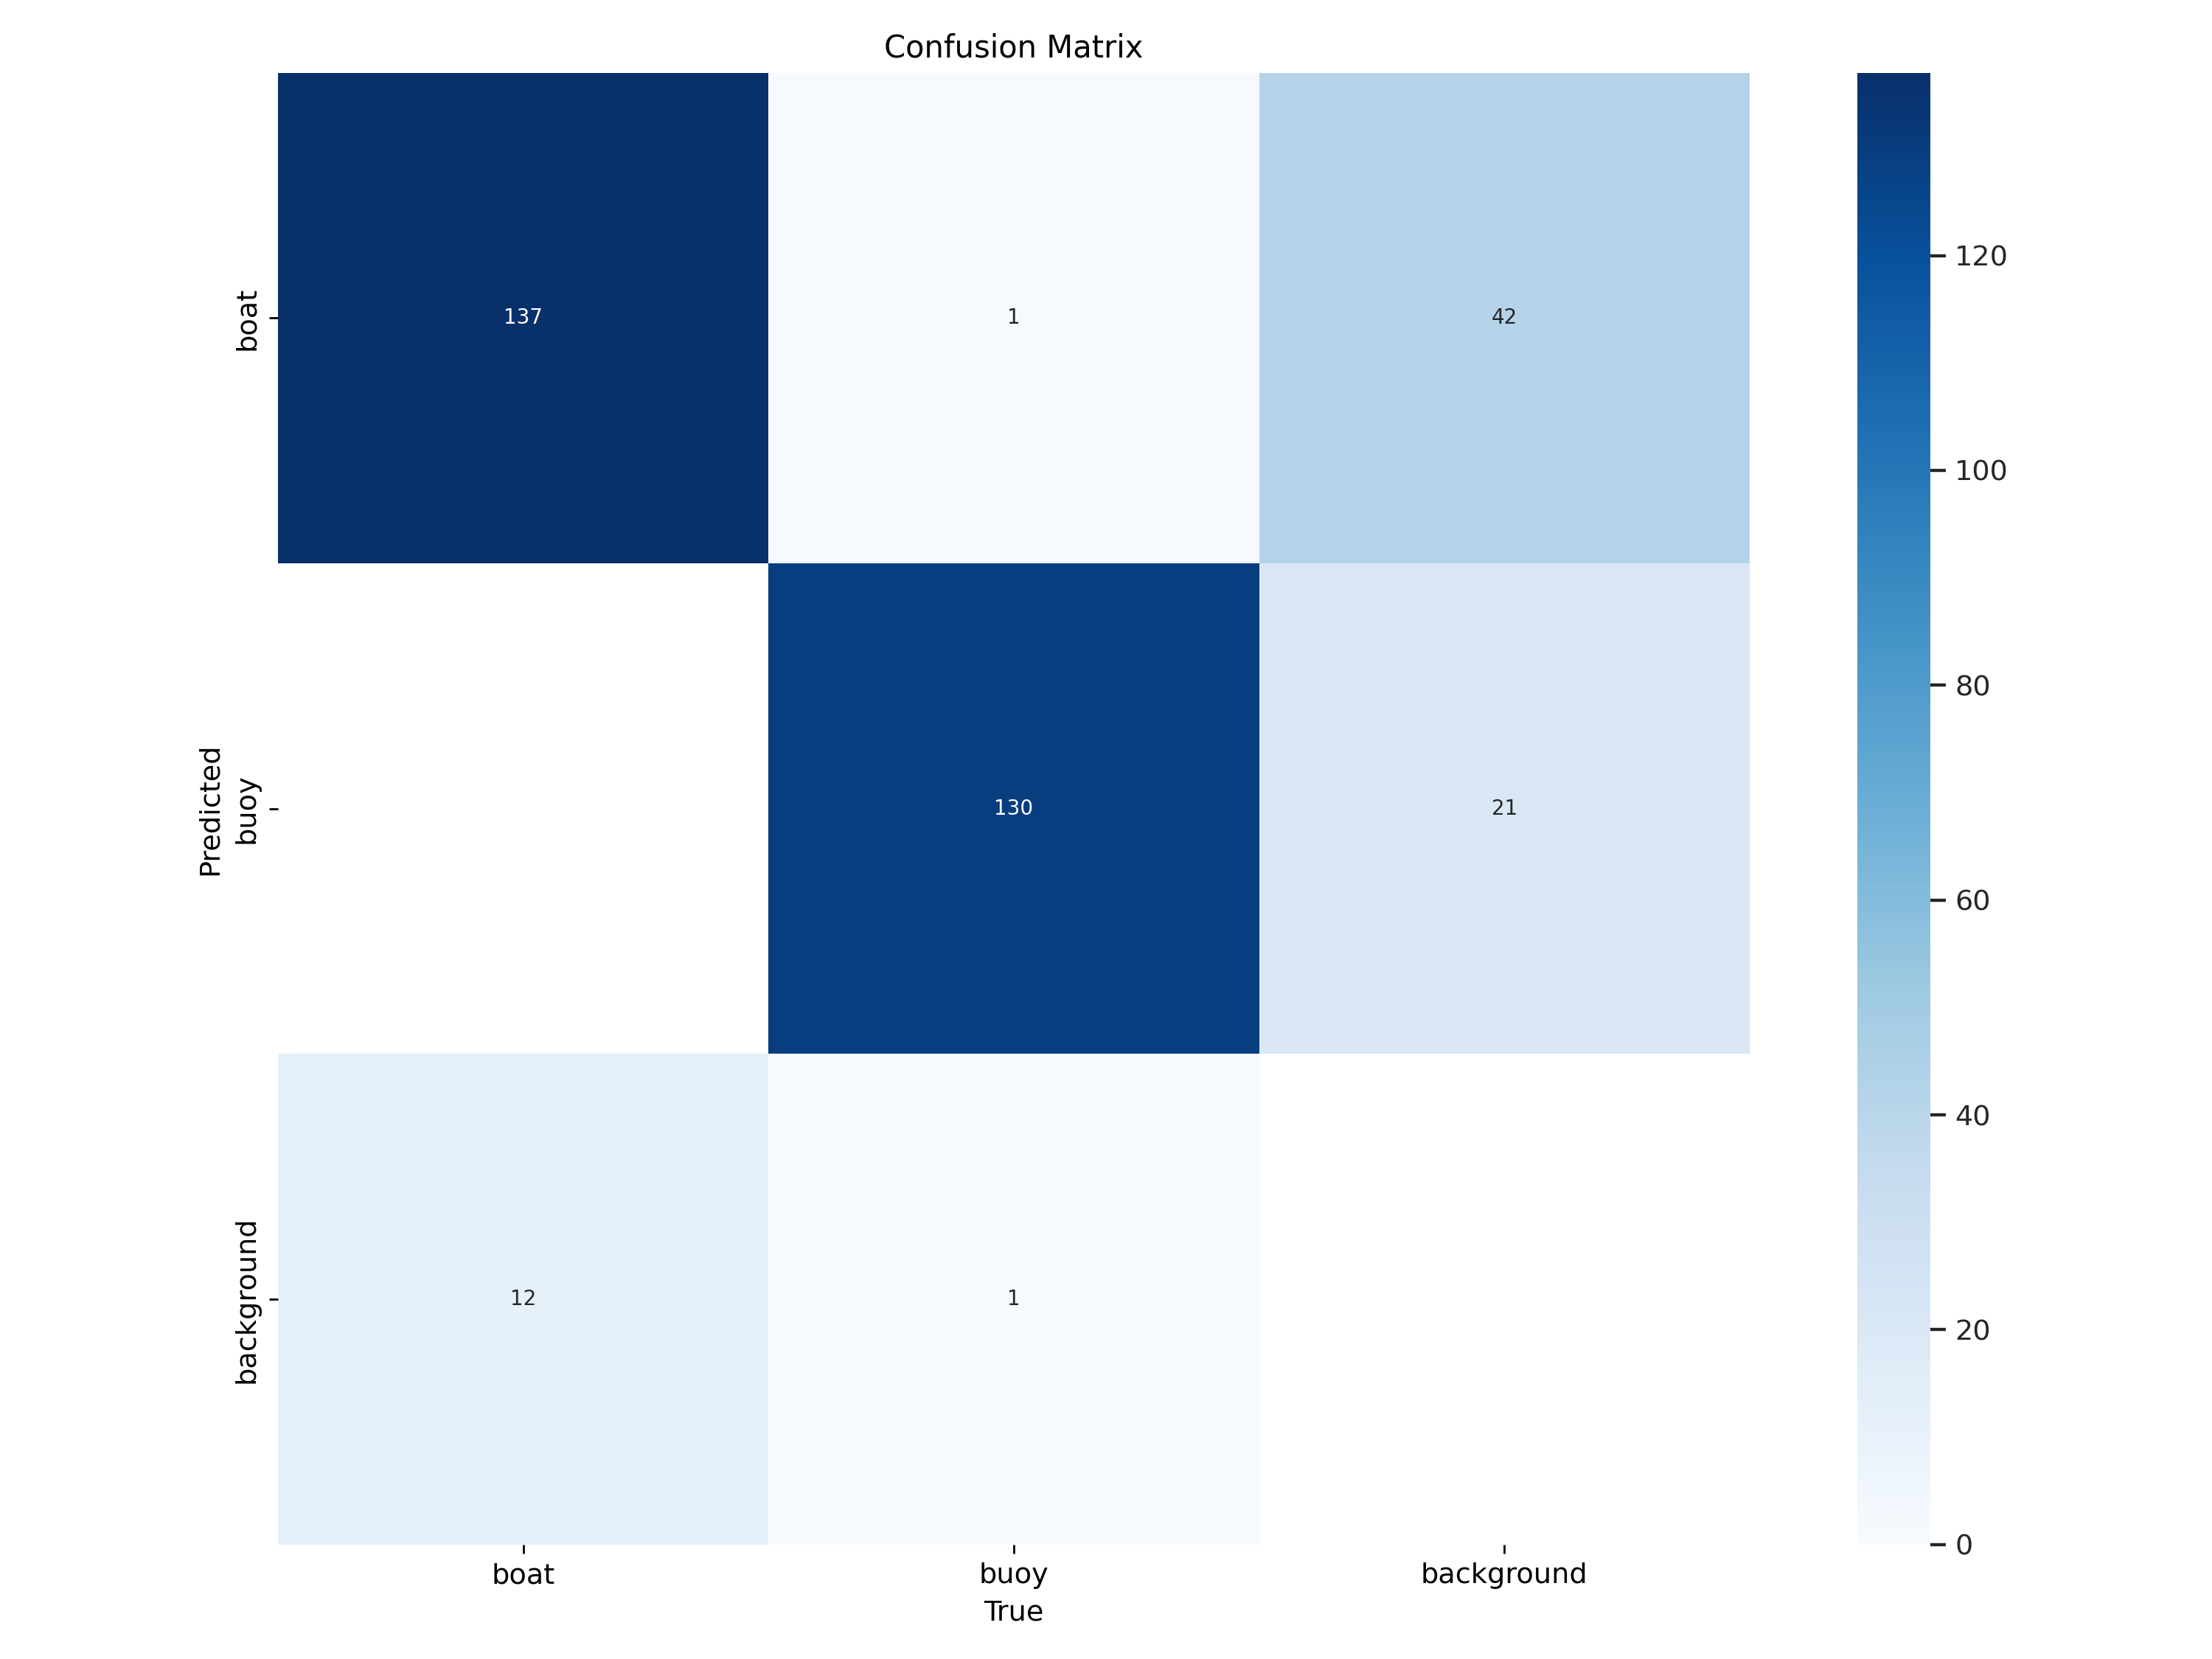

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=1200)

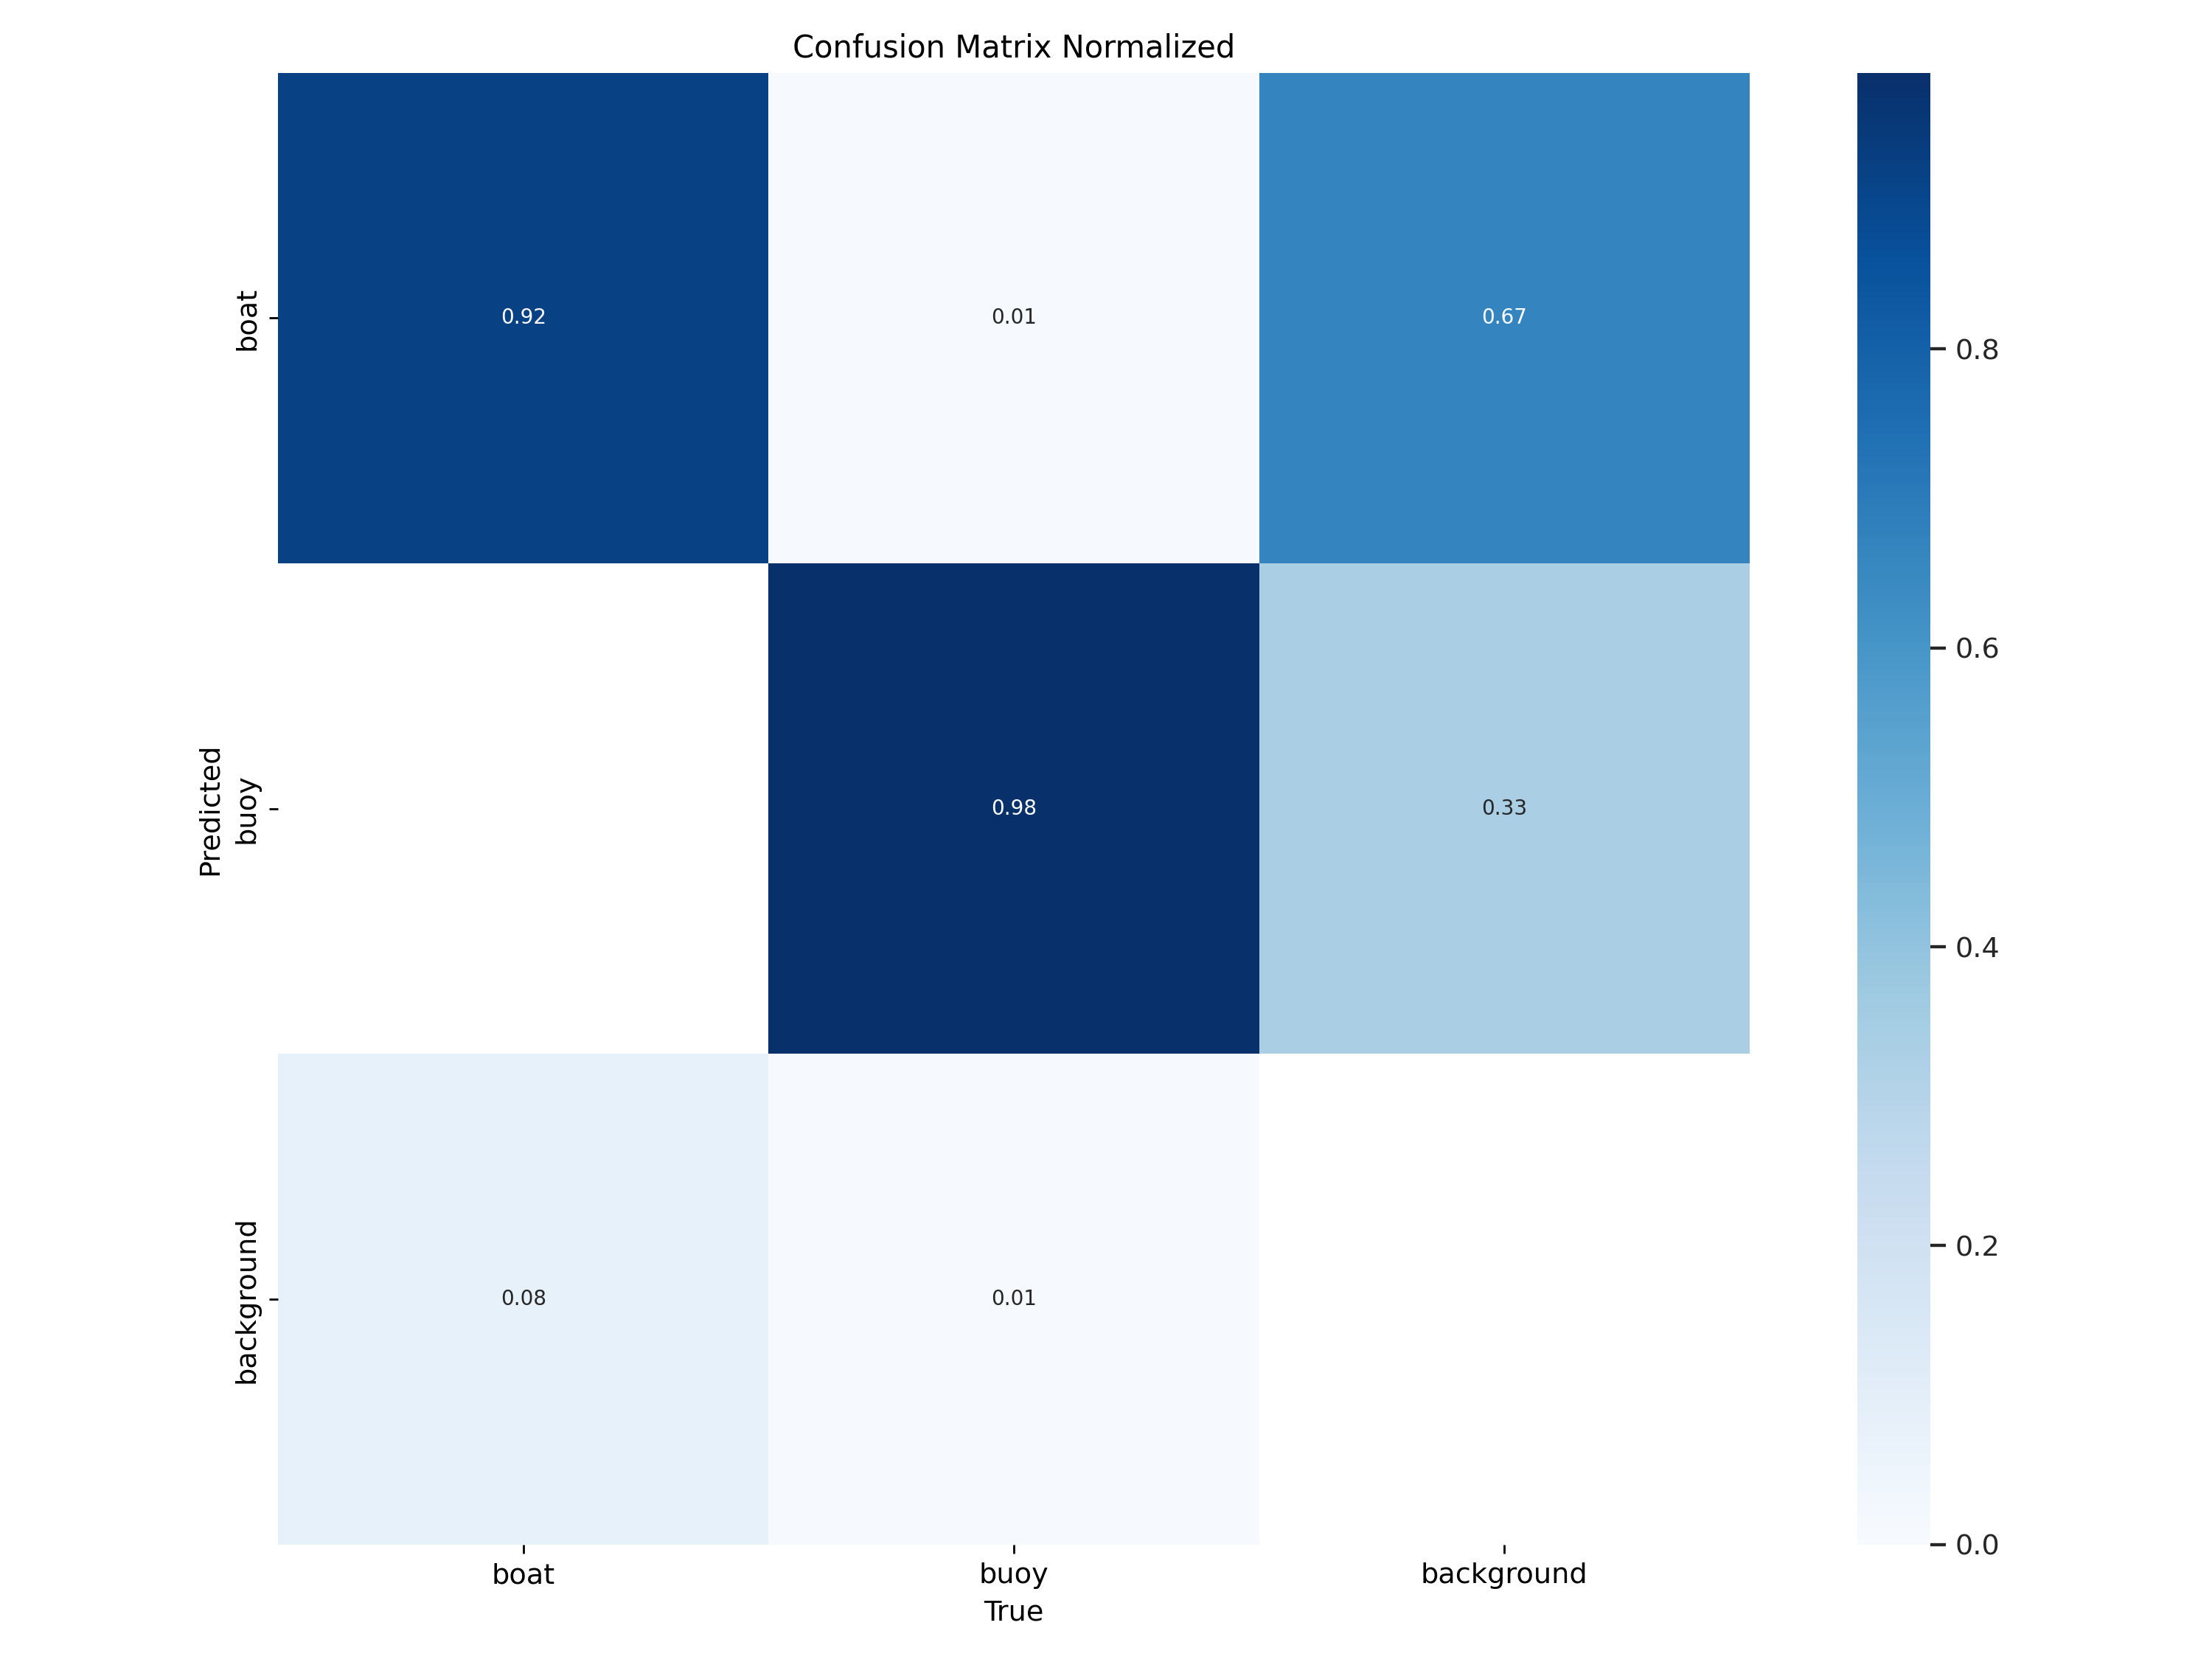

In [ ]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

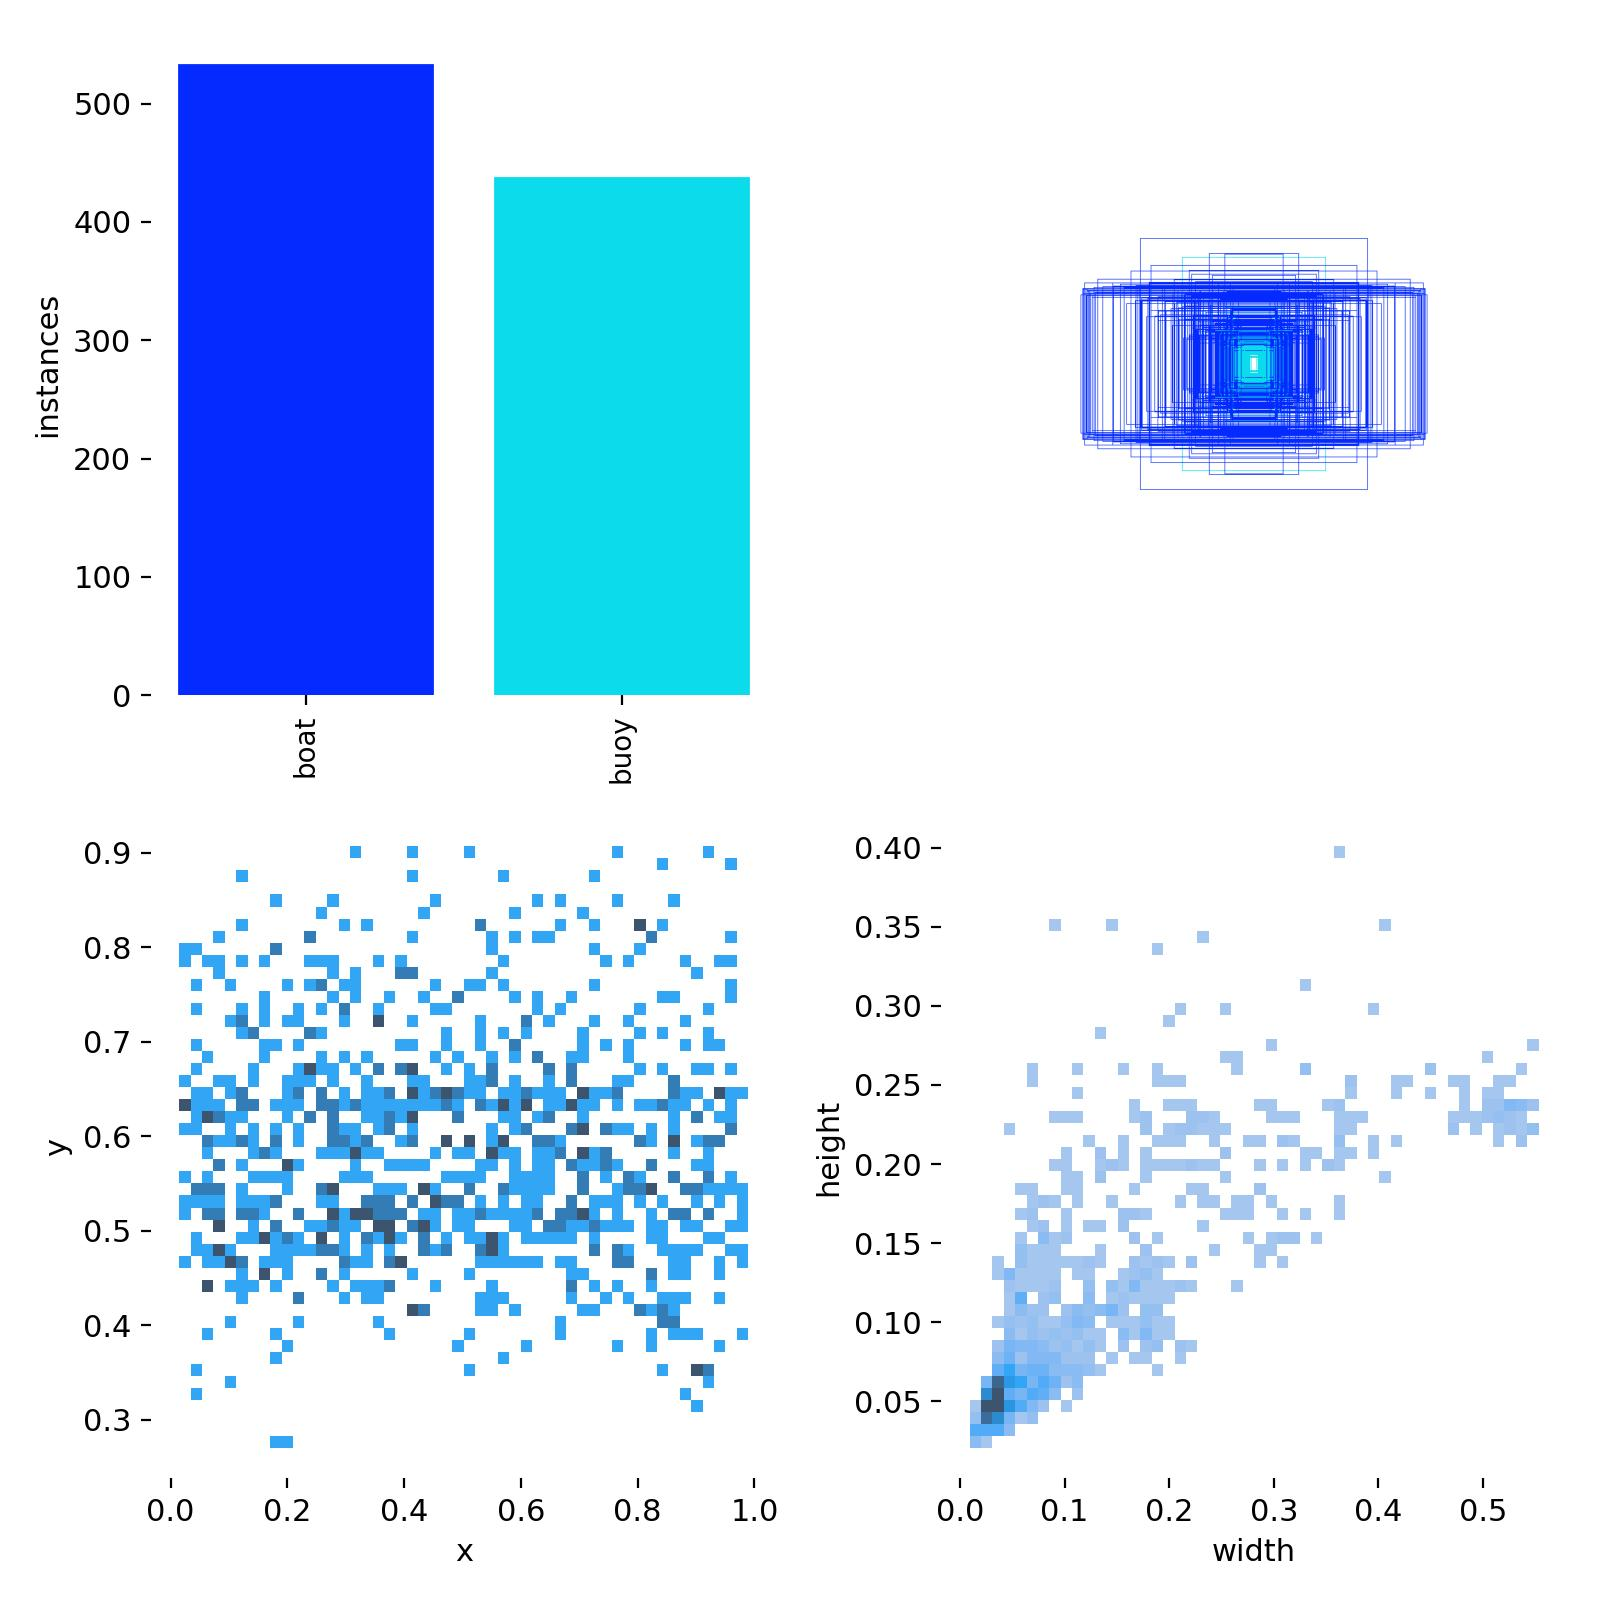

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

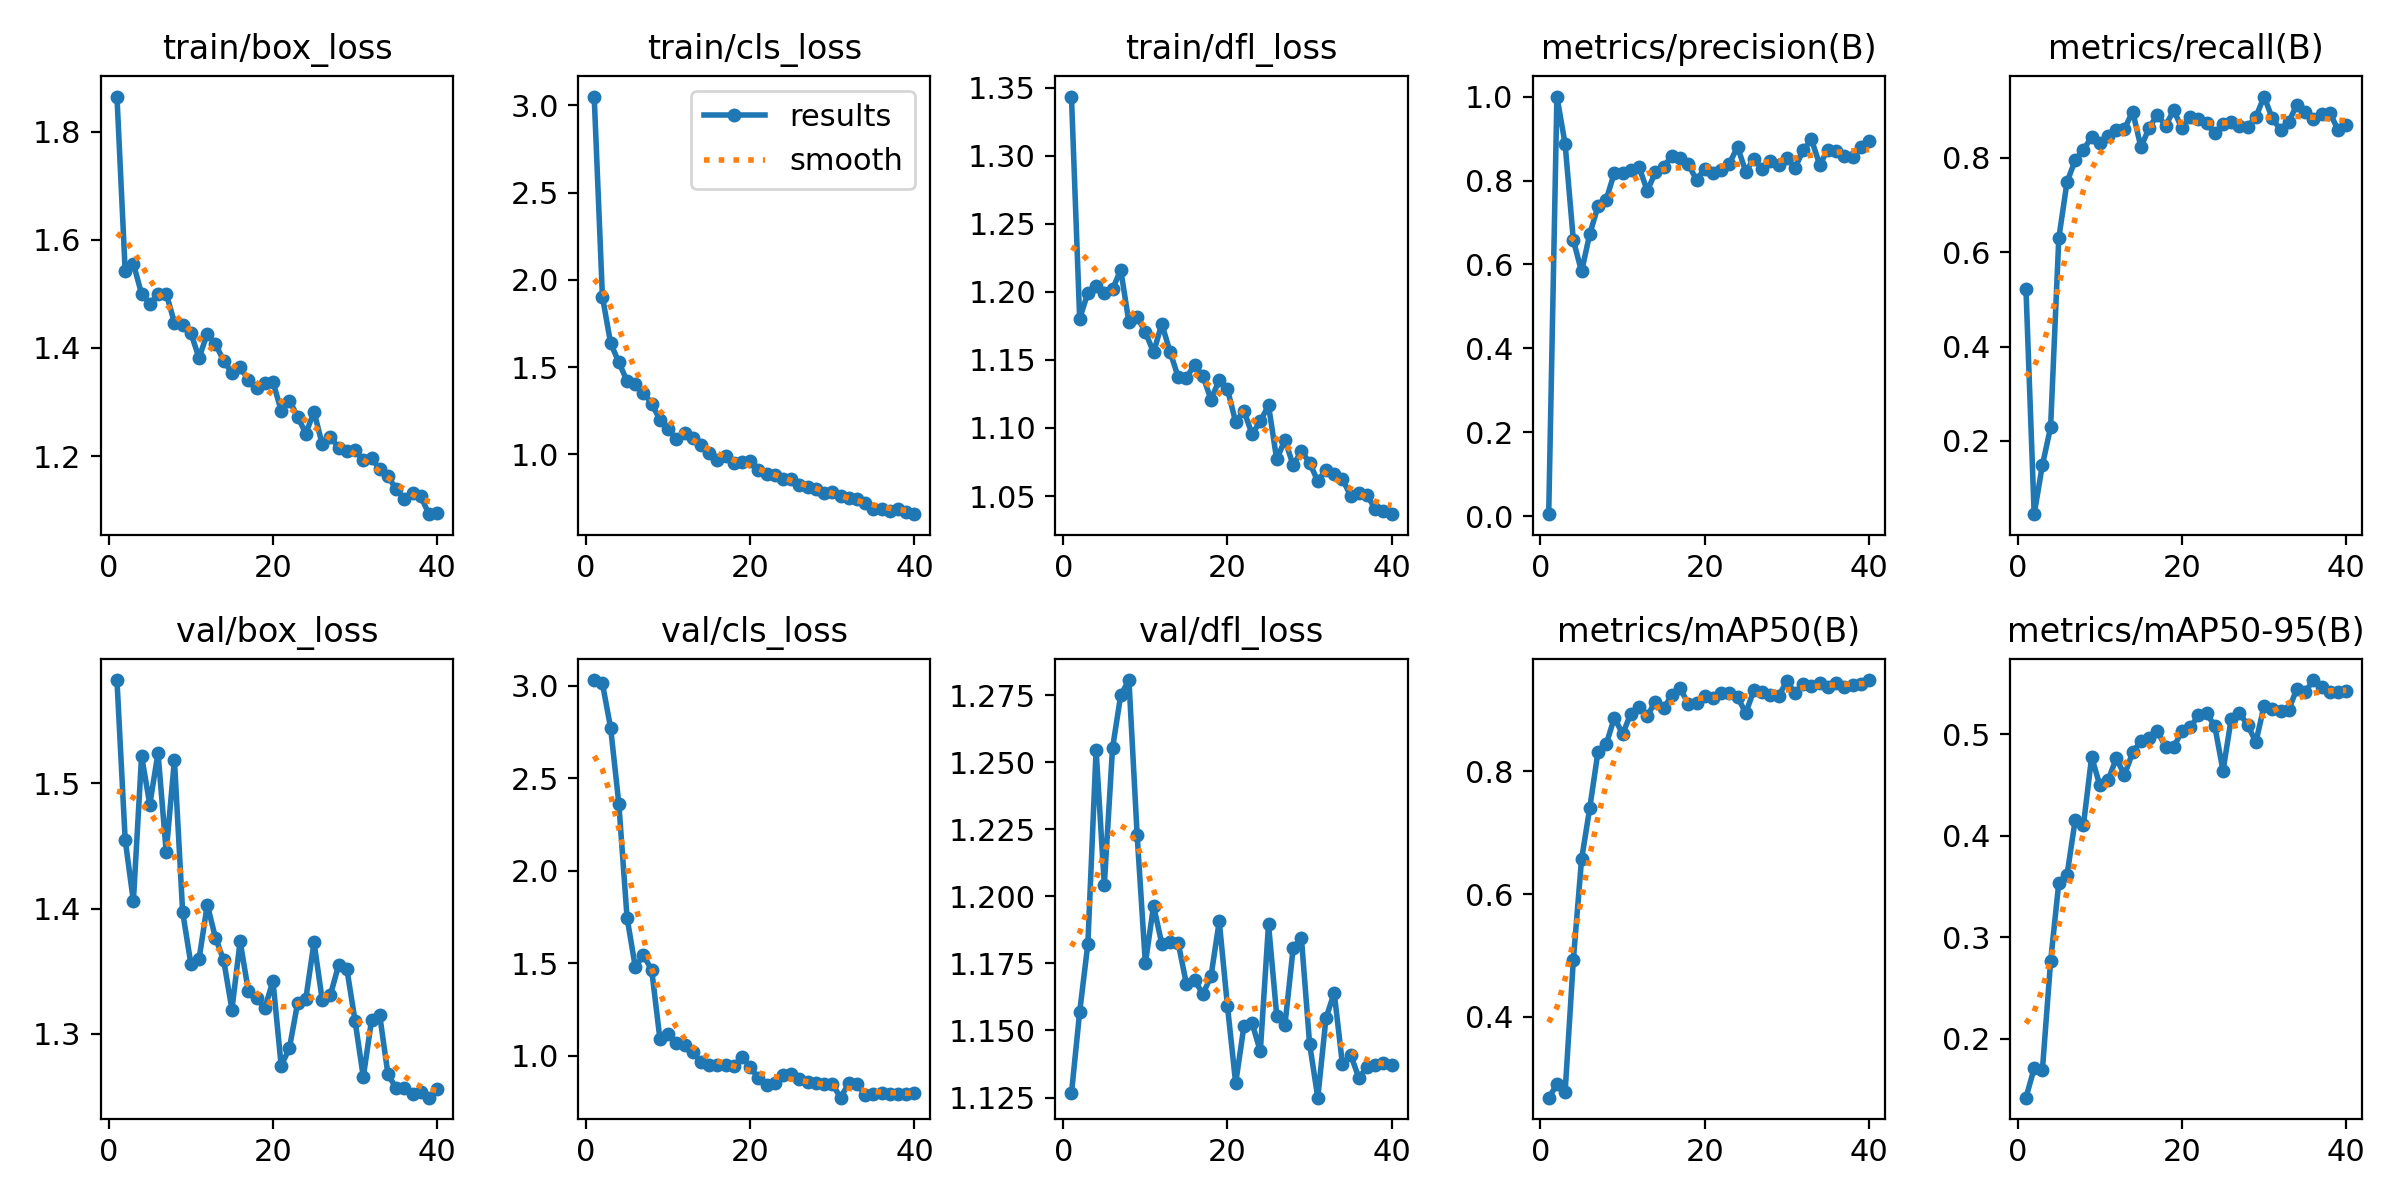

In [ ]:
Image("/content/runs/detect/train/results.png", width=1200)

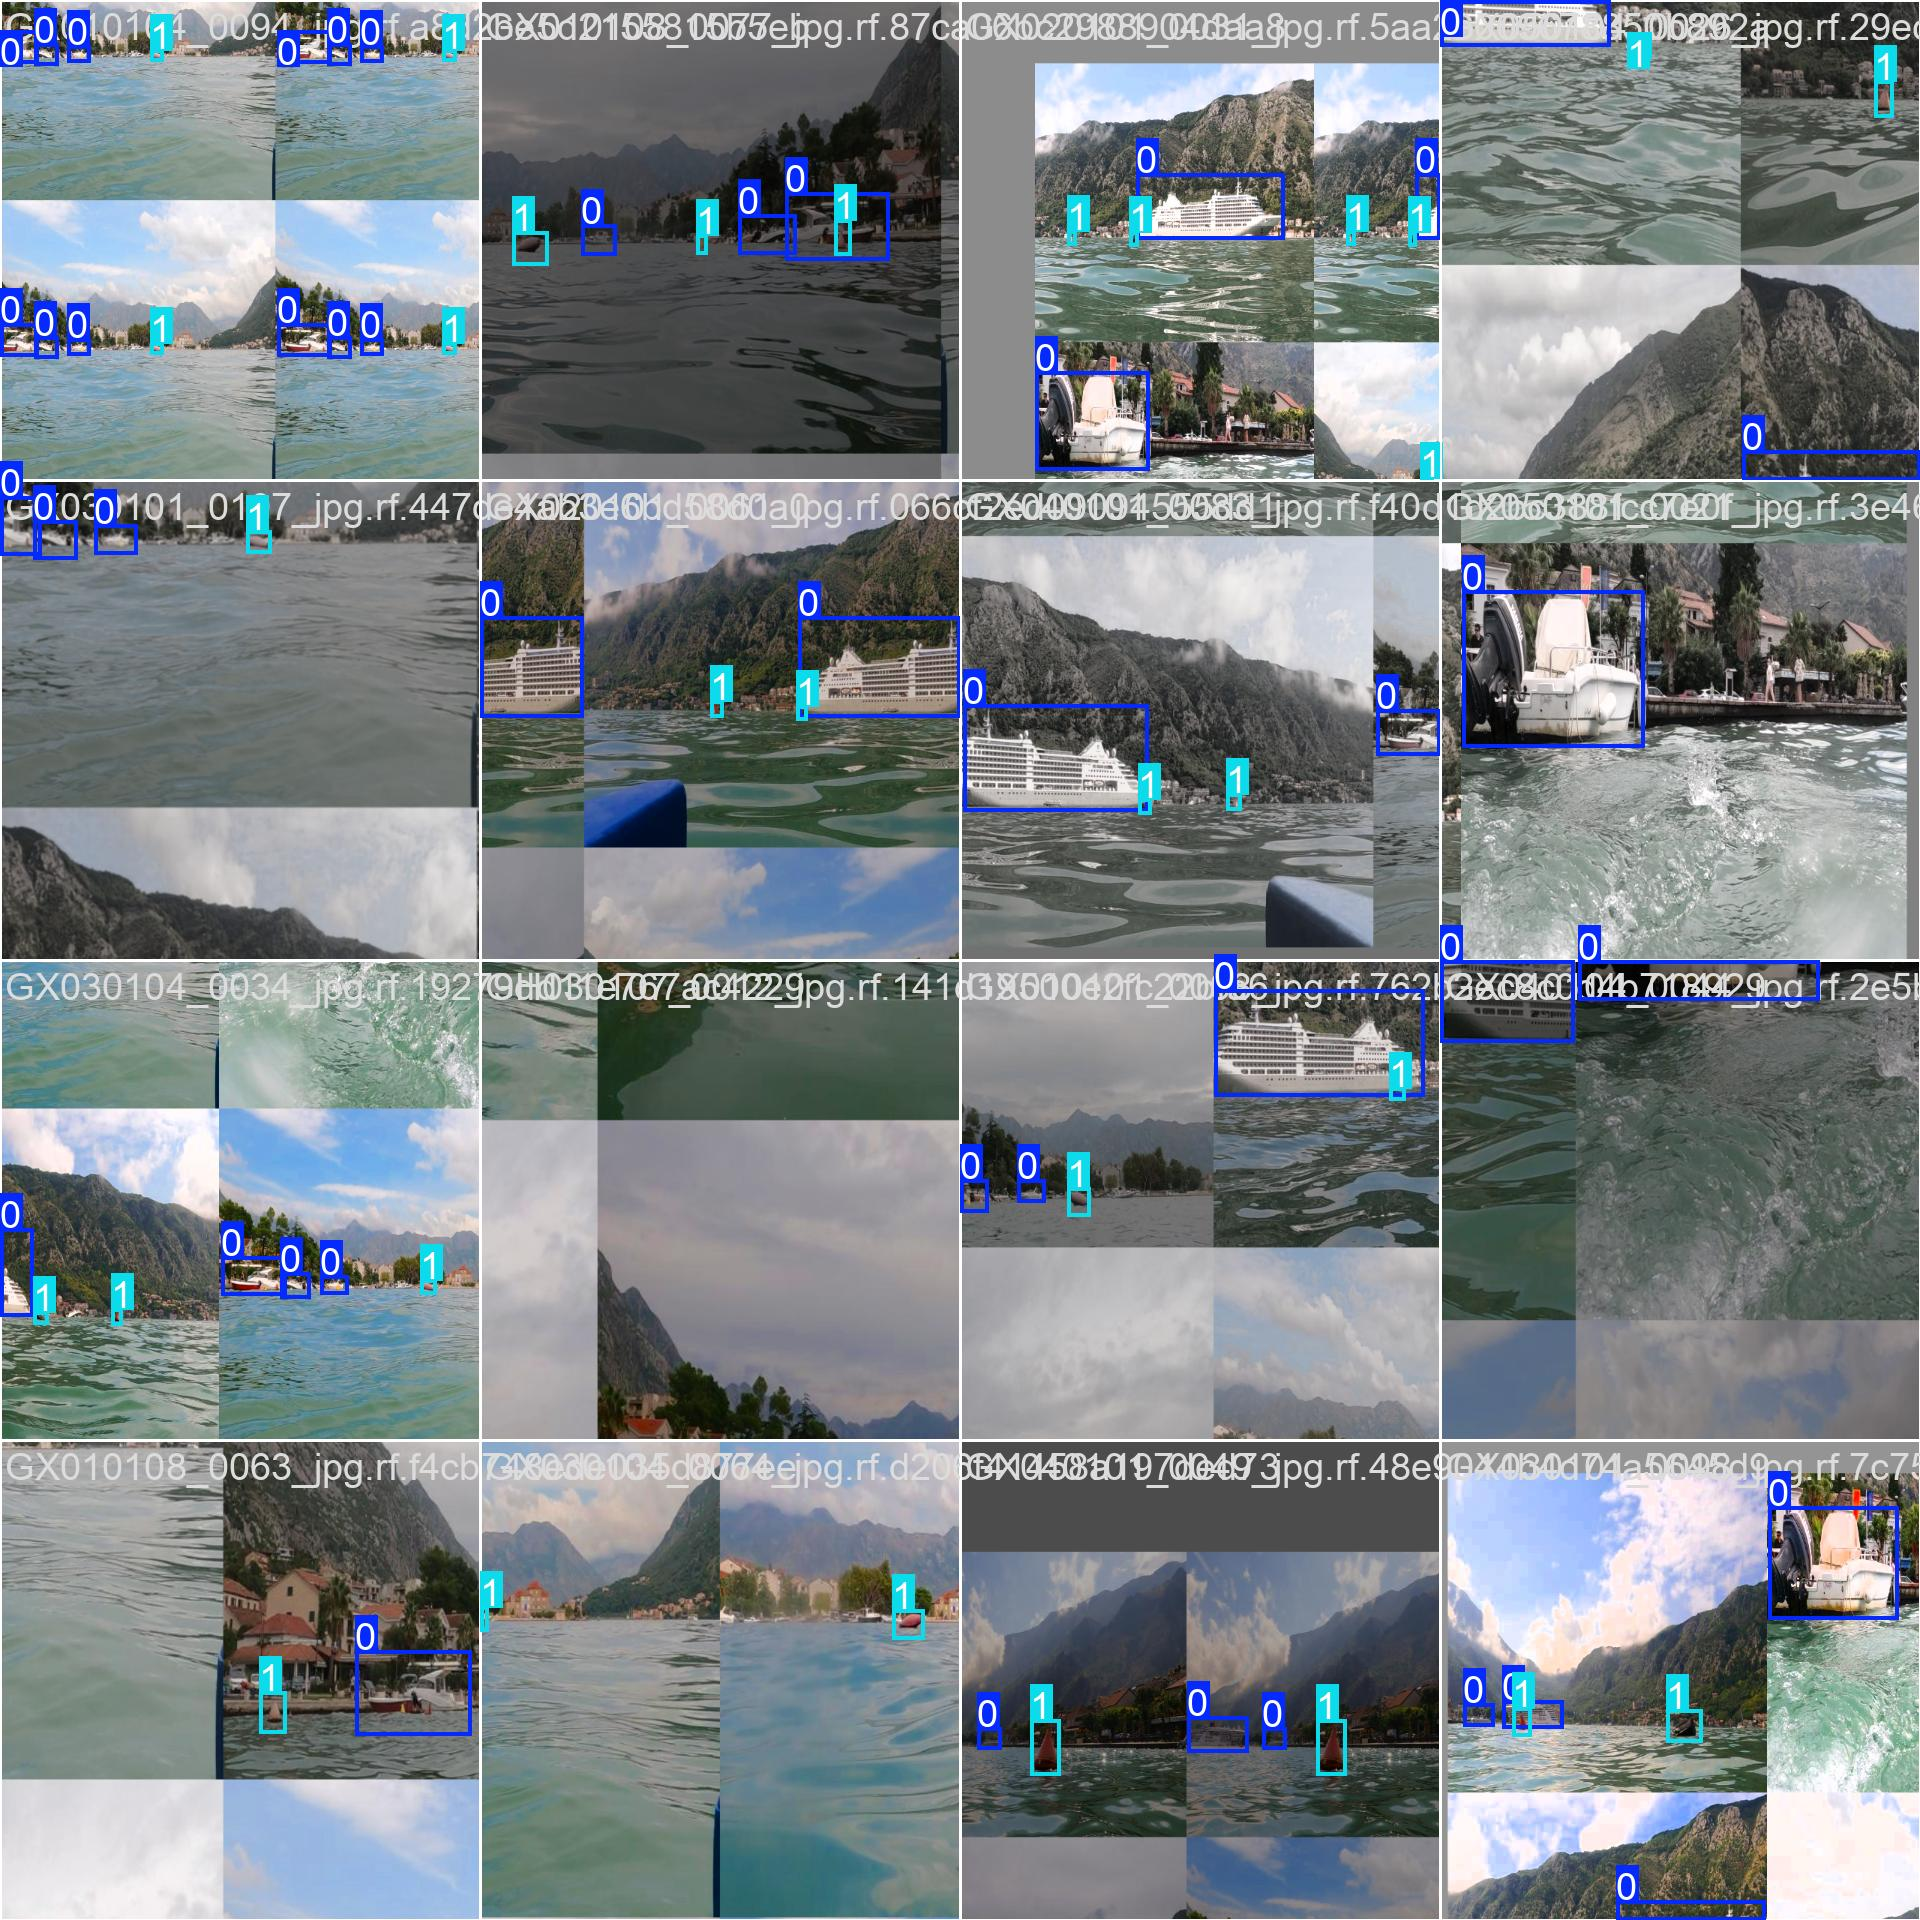

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=1200)

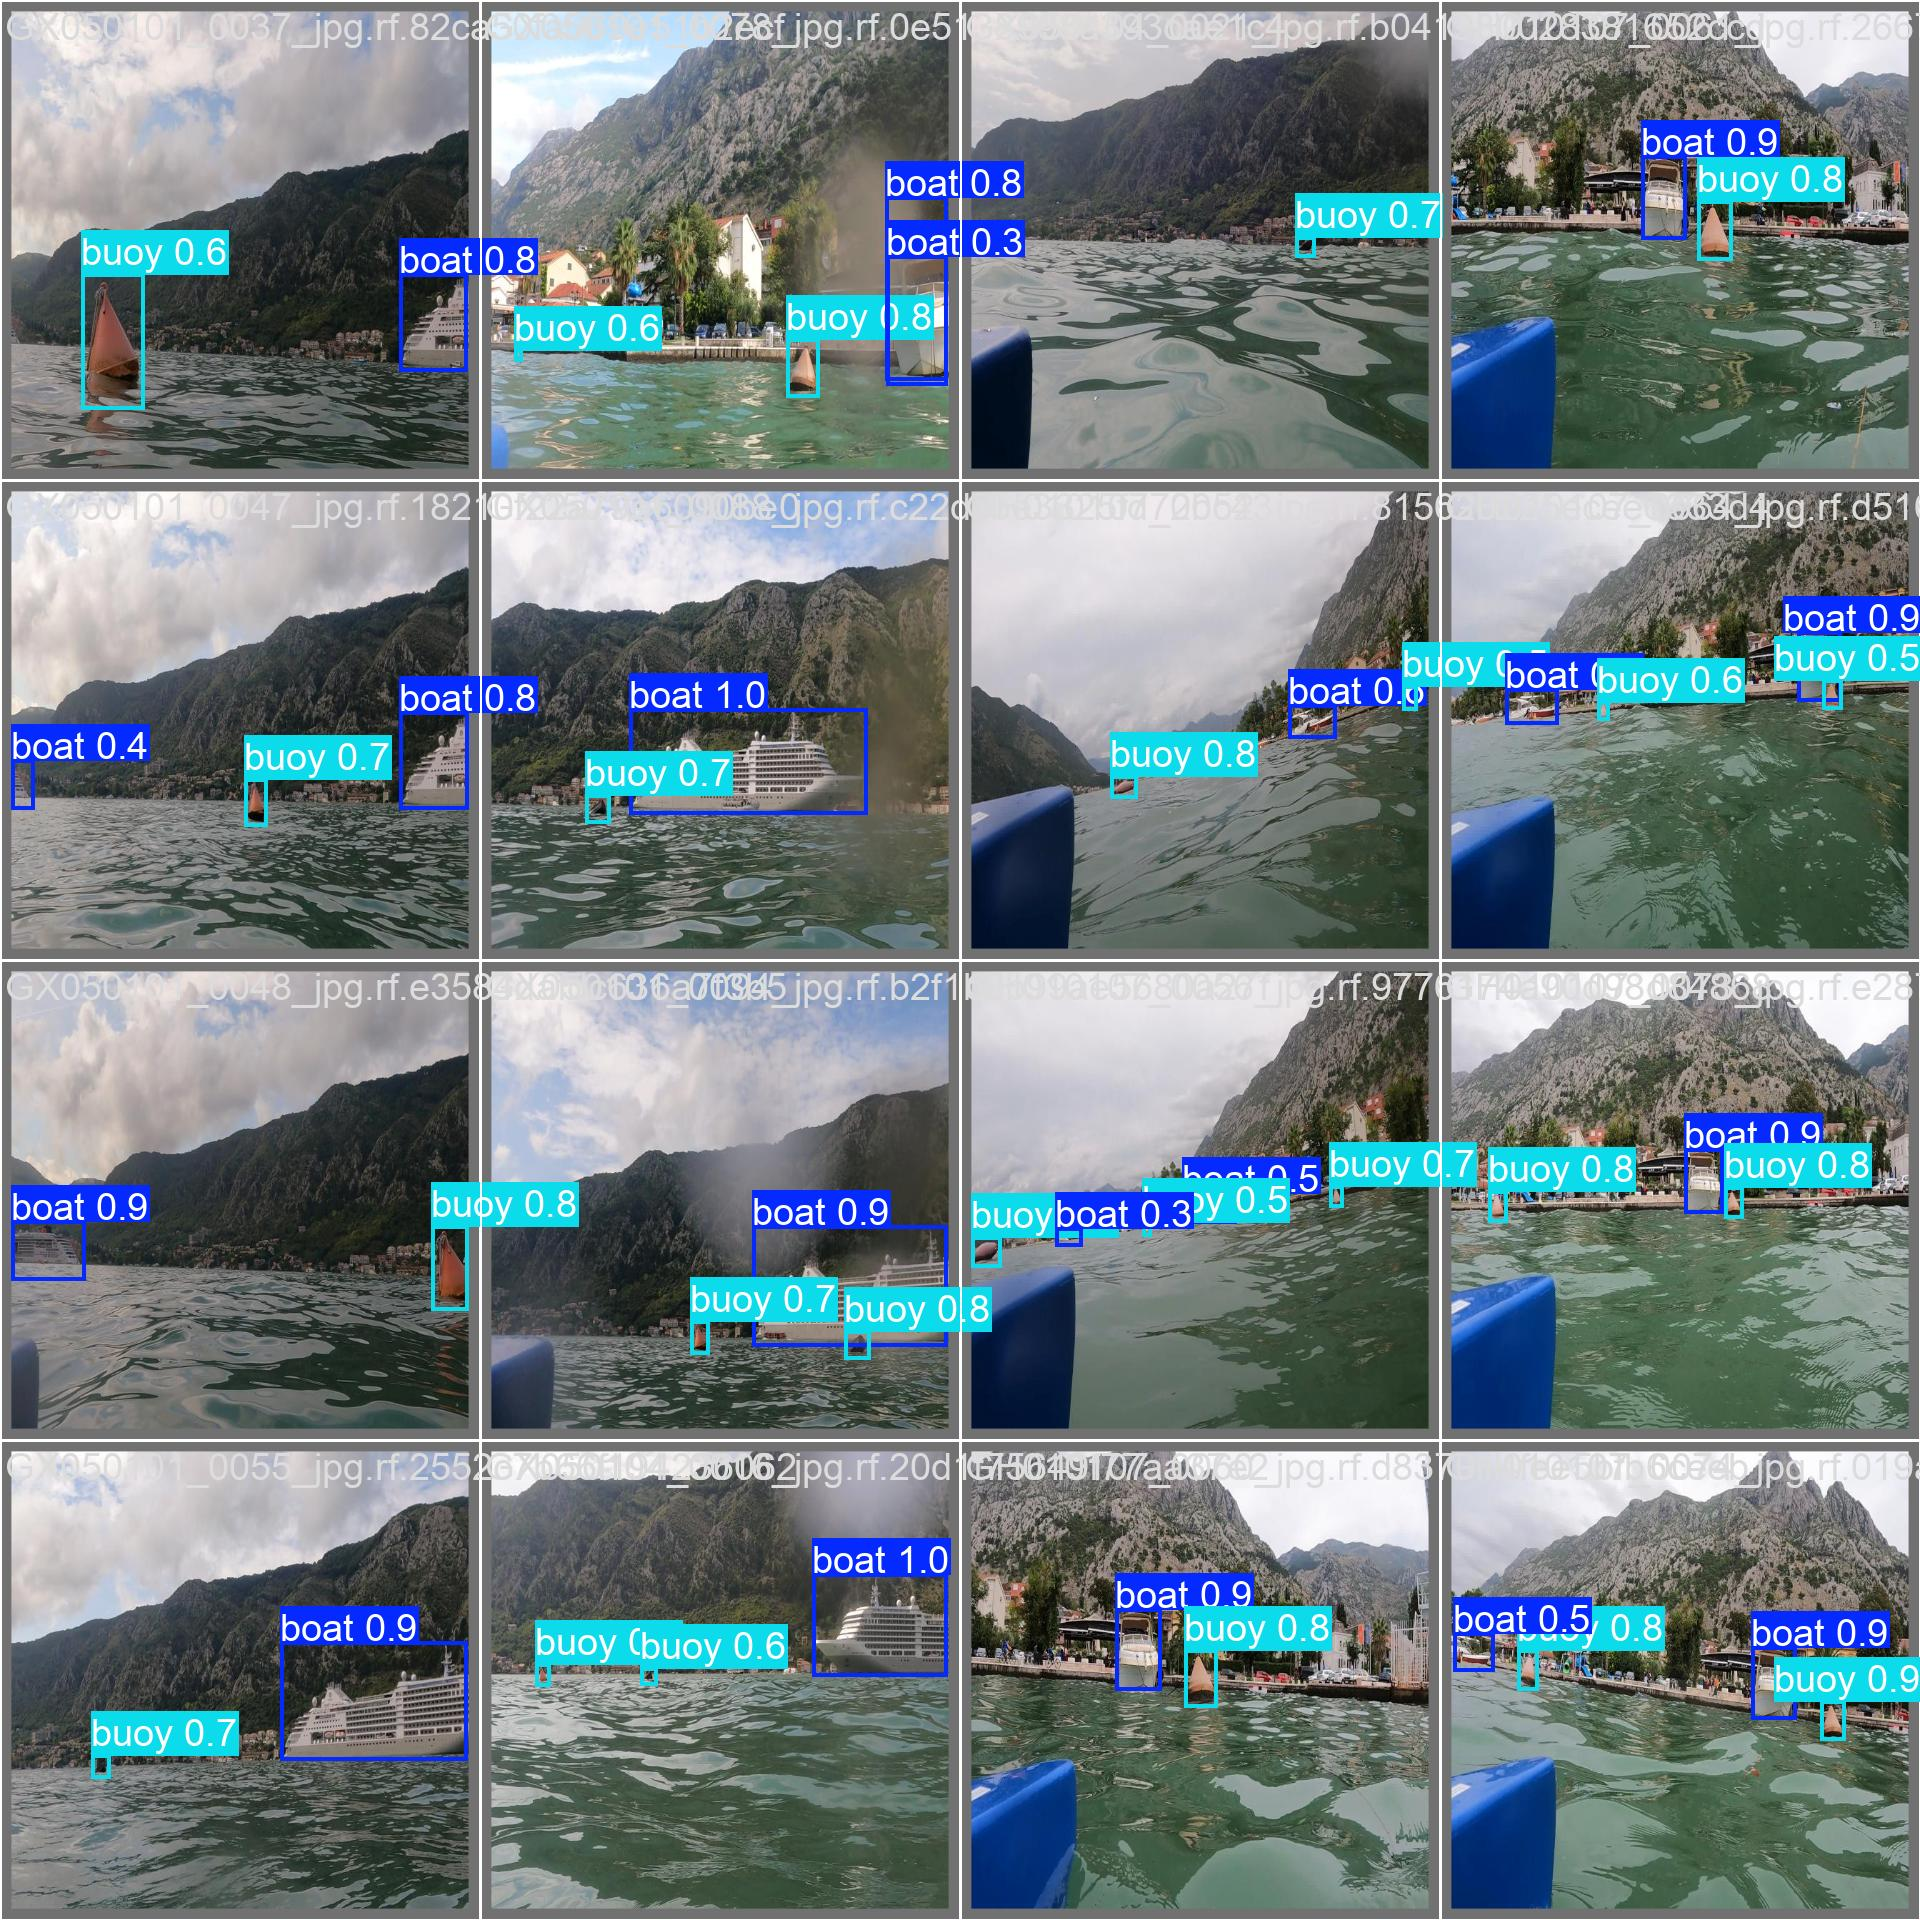

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=1200)

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=1200)

In [ ]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

**Step # 06 Download the Model Weights**

In [ ]:
!mv /content/runs/detect/train/weights/best.pt /content/best.pt

**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/CSI-1/valid/labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100% 99/99 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:02<00:00,  2.55it/s]
                   all         99        281       0.87      0.882      0.944      0.551
                  boat         89        149       0.85      0.836      0.927      0.627
                  buoy         84        132      0.891      0.927       0.96      0.474
Speed: 3.4ms preprocess, 6.3ms inference, 0.0ms loss, 8.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Step # 08 Inference**

In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.47 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/49 /content/CSI-1/test/images/GH010107_0010_jpg.rf.c50b1d0871df838611700cb6d603afec.jpg: 640x640 1 boat, 9.5ms
image 2/49 /content/CSI-1/test/images/GH010107_0050_jpg.rf.d941e2653a9309ee4334883db9636050.jpg: 640x640 1 boat, 2 buoys, 11.2ms
image 3/49 /content/CSI-1/test/images/GH010107_0076_jpg.rf.e847247863b426e4d0e594723b90339c.jpg: 640x640 1 boat, 1 buoy, 7.3ms
image 4/49 /content/CSI-1/test/images/GH030107_0015_jpg.rf.56cae4b5a76f774d463c2faee8b698ee.jpg: 640x640 1 boat, 2 buoys, 7.3ms
image 5/49 /content/CSI-1/test/images/GH030107_0017_jpg.rf.7d100190aa2d48d2c91c0f26e9ff498f.jpg: 640x640 2 boats, 7.3ms
image 6/49 /content/CSI-1/test/images/GX010101_0024_jpg.rf.de230cdca7901a0c2d80b7b204111cdd.jpg: 640x640 1 boat, 2 buoys, 7.3ms
image 7/49 /content/CSI-1/test/images/GX010101_0029_jpg.rf.7b682ed832da85a8ef9b81e114

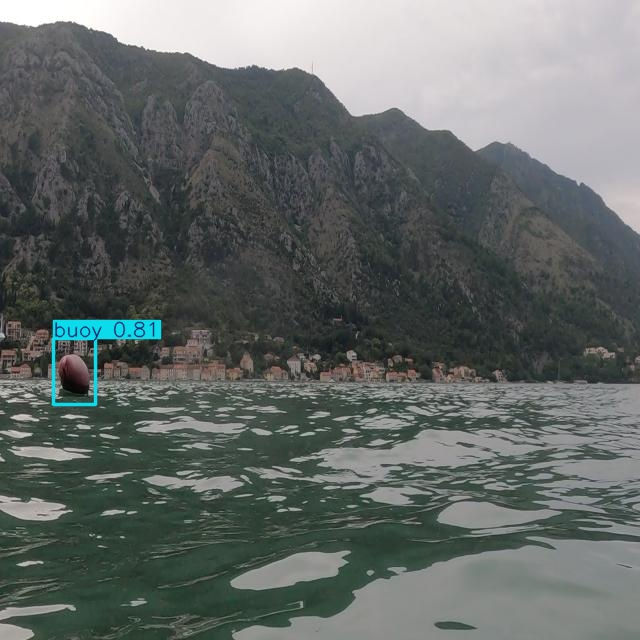

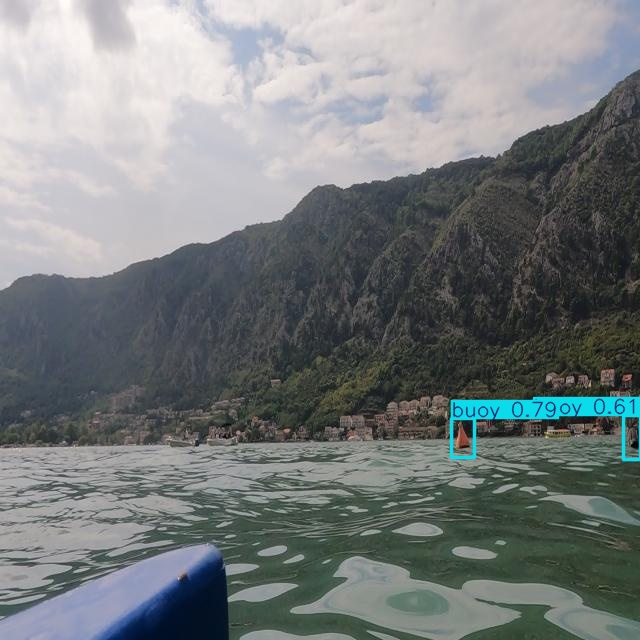

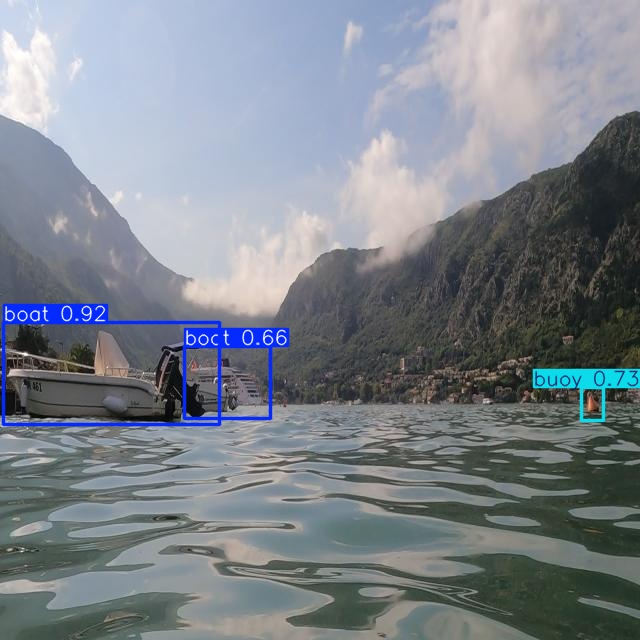

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!gdown "https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t
To: /content/image2.jpg
100% 77.7k/77.7k [00:00<00:00, 76.1MB/s]


In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source=image2.jpg save=True

Ultralytics 8.3.47 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 972, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 558, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 188, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 36, in generator_context
    response = gen.send(None)
  File "/usr/local/lib/python3.10